In [1]:
CONFIRMED = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DEATHS = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
RECOVERED = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [2]:
import pandas as pd
from doctest import testmod

In [3]:
confirmed = pd.read_csv(CONFIRMED)
deaths = pd.read_csv(DEATHS)
recovered = pd.read_csv(RECOVERED)

In [7]:
def _get(country, name, data):
    df = (data
            .loc[data['Country/Region'] == country]
            .transpose()[4:]
        )

    df.columns = [name]
    df.index = pd.to_datetime(df.index)
    
    return df
  
def get(country):
    """
    >>> pl = get('Poland')
    >>> row = poland.loc['2020-10-13']
    >>> row['Confirmed'], row['Recovered'], row['Deaths']
    (135278, 82004, 3101)

    
    """
    c = _get(country, 'Confirmed', confirmed)
    d = _get(country, 'Deaths', deaths)
    r = _get(country, 'Recovered', recovered)
    return pd.concat((
        _get(country, 'Confirmed', confirmed),
        _get(country, 'Deaths', deaths),
        _get(country, 'Recovered', recovered)
    ), axis = 'columns')

testmod()

**********************************************************************
File "__main__", line 15, in __main__.get
Failed example:
    row = poland.loc['2020-10-13']
Exception raised:
    Traceback (most recent call last):
      File "D:\Anaconda3\lib\doctest.py", line 1329, in __run
        compileflags, 1), test.globs)
      File "<doctest __main__.get[1]>", line 1, in <module>
        row = poland.loc['2020-10-13']
    NameError: name 'poland' is not defined
**********************************************************************
File "__main__", line 16, in __main__.get
Failed example:
    row['Confirmed'], row['Recovered'], row['Deaths']
Exception raised:
    Traceback (most recent call last):
      File "D:\Anaconda3\lib\doctest.py", line 1329, in __run
        compileflags, 1), test.globs)
      File "<doctest __main__.get[2]>", line 1, in <module>
        row['Confirmed'], row['Recovered'], row['Deaths']
    NameError: name 'row' is not defined
*************************************

TestResults(failed=2, attempted=3)

In [37]:
poland = get('Poland')

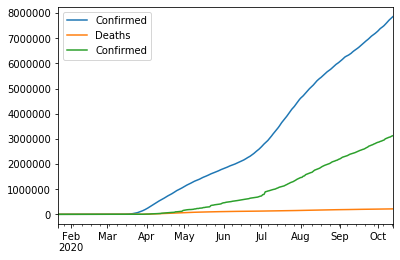

In [33]:
us_confirmed = get('US', 'Confirmed', confirmed)
us_deaths = get('US', 'Deaths', deaths)
us_recovered = get('US', 'Confirmed', recovered)

us = pd.concat((us_confirmed, us_deaths, us_recovered), axis = 'columns')
us.plot()

In [6]:
def _get(country, name, data):
    if country:
        query = data['Country/Region'] == country
        data = data.loc[query]
        
    data = (data
          .transpose()[4:]
          .sum(axis='columns')
          .map(int))
    
    return pd.DataFrame(
        data = data,
        columns = [name],
        index = pd.to_datetime(data.index))


def get(country=None):
    """
    >>> pl = get('Poland')
    >>> pl = pl.loc['2020-10-13']
    >>> pl['Confirmed'], pl['Recovered'], pl['Deaths']
    (135278, 82004, 3101)
    """
    return pd.concat((
        _get(country, 'Confirmed', confirmed),
        _get(country, 'Deaths', deaths),
        _get(country, 'Recovered', recovered)
    ), axis='columns')

testmod()

TestResults(failed=0, attempted=3)

In [ ]:
poland = get('Poland')
us = get('US')
india = get('India')
brazil = get('Brazil')
china = get('China')
france = get('France')
world = get()